In [21]:
library(caret)

In [22]:
file <- "E:/Homework/IS/out_data/model_data/model_data.csv"
data <- read.csv(file, header = TRUE, sep = ",", stringsAsFactors = TRUE)

In [23]:
# Assuming your data is stored in a data frame called 'data'
numeric_columns <- sapply(data, is.numeric)
scaled_numeric_data <- scale(data[, numeric_columns])

df <- data
df[, numeric_columns] <- scaled_numeric_data

summary(df)

 ConvertedCompYearly
 Min.   :-1.5591    
 1st Qu.:-0.7394    
 Median :-0.2068    
 Mean   : 0.0000    
 3rd Qu.: 0.6202    
 Max.   : 2.8557    
                    
                                                                                 MainBranch   
 I am a developer by profession                                                       :37850  
 I am not primarily a developer, but I write code sometimes as part of my work/studies: 2729  
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                 Age       
 18-24 years old   : 3874  
 25-34 years old

In [24]:
df= na.omit(df)

In [25]:
set.seed(123)
trainIndex <- createDataPartition(df$ConvertedCompYearly, p = 0.7, list = FALSE)
train_data <- df[trainIndex, ]
test_data <- df[-trainIndex, ]

In [26]:
summary(train_data)

 ConvertedCompYearly
 Min.   :-1.559061  
 1st Qu.:-0.739359  
 Median :-0.206751  
 Mean   : 0.002208  
 3rd Qu.: 0.620241  
 Max.   : 2.855741  
                    
                                                                                 MainBranch   
 I am a developer by profession                                                       :26483  
 I am not primarily a developer, but I write code sometimes as part of my work/studies: 1924  
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                 Age       
 18-24 years old   : 2695  
 25-34 years old

In [27]:
# Define the control parameters for train function
ctrl <- trainControl(method = "cv", number = 5, savePredictions = "final")

In [28]:
# Linear Regression Model
lm_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "lm", trControl = ctrl)

In [29]:
summary(lm_model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6695 -0.5954 -0.1231  0.5022  3.3731 

Coefficients:
                                                                                                          Estimate
(Intercept)                                                                                              -0.283190
`MainBranchI am not primarily a developer, but I write code sometimes as part of my work/studies`        -0.048251
`Age25-34 years old`                                                                                      0.246969
`Age35-44 years old`                                                                                      0.357158
`Age45-54 years old`                                                                                      0.238426
`Age55-64 years old`                                                                                      0.147658
`Age65 years or older`                  

In [30]:
# Forward Selection Model
forward_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapForward", trControl = ctrl)

In [31]:
# Backward Selection Model
backward_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapBackward", trControl = ctrl)

In [32]:
# Stepwise Selection Model
stepwise_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapSeq", trControl = ctrl)

In [33]:
# Ridge Regression
ridge_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "glmnet", trControl = ctrl, 
                     tuneGrid = expand.grid(alpha = 0, lambda = seq(0.001, 0.1, length = 10)))

In [34]:
# Lasso Regression
lasso_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "glmnet", trControl = ctrl, 
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0.001, 0.1, length = 10)))

In [35]:
# Principal Component Analysis (PCA)
pca_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "pcr", trControl = ctrl, 
                   tuneLength = 10)

In [36]:
# Decision Tree Model
dt_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "rpart", trControl = ctrl)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [37]:
# Random Forest Model
rf_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "rf", trControl = ctrl, importance = TRUE)

In [38]:
# SVM Model
svm_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "svmRadial", trControl = ctrl)

In [39]:
nnet_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "nnet", trControl = ctrl)

# weights:  95
initial  value 25068.840473 
final  value 22712.576409 
converged
# weights:  283
initial  value 31672.938723 
final  value 22712.576409 
converged
# weights:  471
initial  value 30622.975155 
final  value 22712.576409 
converged
# weights:  95
initial  value 27251.614792 
iter  10 value 22766.896827
iter  20 value 20704.394766
iter  30 value 20133.719763
iter  40 value 19933.834869
iter  50 value 19809.311315
iter  60 value 19701.966131
iter  70 value 19640.648277
iter  80 value 19564.255488
iter  90 value 19489.861309
iter 100 value 19451.910388
final  value 19451.910388 
stopped after 100 iterations
# weights:  283
initial  value 26314.787723 
iter  10 value 22041.817996
iter  20 value 20755.898292
iter  30 value 20245.018228
iter  40 value 19936.279477
iter  50 value 19722.073625
iter  60 value 19533.379107
iter  70 value 19405.448363
iter  80 value 19329.704213
iter  90 value 19273.527961
iter 100 value 19233.032044
final  value 19233.032044 
stopped after 100 itera

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

# weights:  95
initial  value 32855.075391 
iter  10 value 28438.359809
iter  20 value 26208.543031
iter  30 value 25271.062408
iter  40 value 24983.888811
iter  50 value 24776.329362
iter  60 value 24678.113328
iter  70 value 24614.882864
iter  80 value 24551.328856
iter  90 value 24474.458964
iter 100 value 24392.503349
final  value 24392.503349 
stopped after 100 iterations


In [42]:
# Evaluate the models on the testing set
models <- list(lm_model, forward_model, backward_model, stepwise_model, ridge_model , lasso_model, pca_model, dt_model,  rf_model, svm_model, nnet_model)
results <- resamples(models)

# Compare the models using the same evaluation methods
summary(results)


Call:
summary.resamples(object = results)

Models: Model01, Model02, Model03, Model04, Model05, Model06, Model07, Model08, Model09, Model10, Model11 
Number of resamples: 5 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Model01 0.6730719 0.6738125 0.6740758 0.6760129 0.6763877 0.6827167    0
Model02 0.7178679 0.7233614 0.7254380 0.7257413 0.7261055 0.7359335    0
Model03 0.7252610 0.7316513 0.7324642 0.7327974 0.7353952 0.7392151    0
Model04 0.7216766 0.7235247 0.7260284 0.7257868 0.7281515 0.7295528    0
Model05 0.6695175 0.6735280 0.6767237 0.6762869 0.6770713 0.6845943    0
Model06 0.6662187 0.6777290 0.6784132 0.6760104 0.6787152 0.6789760    0
Model07 0.7218526 0.7274302 0.7281527 0.7273965 0.7285814 0.7309657    0
Model08 0.7446558 0.7464155 0.7484736 0.7519842 0.7594884 0.7608875    0
Model09 0.6762990 0.6806907 0.6813762 0.6818314 0.6817331 0.6890582    0
Model10 0.6520720 0.6551821 0.6559620 0.6565017 0.6592251 0.6600672    0
Model11 0.767896

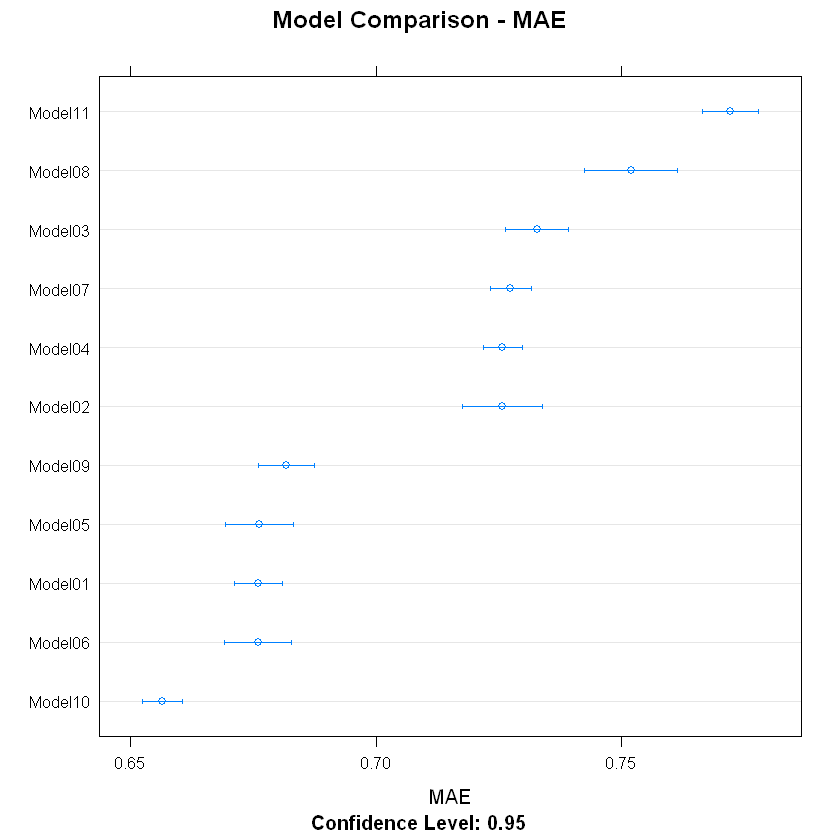

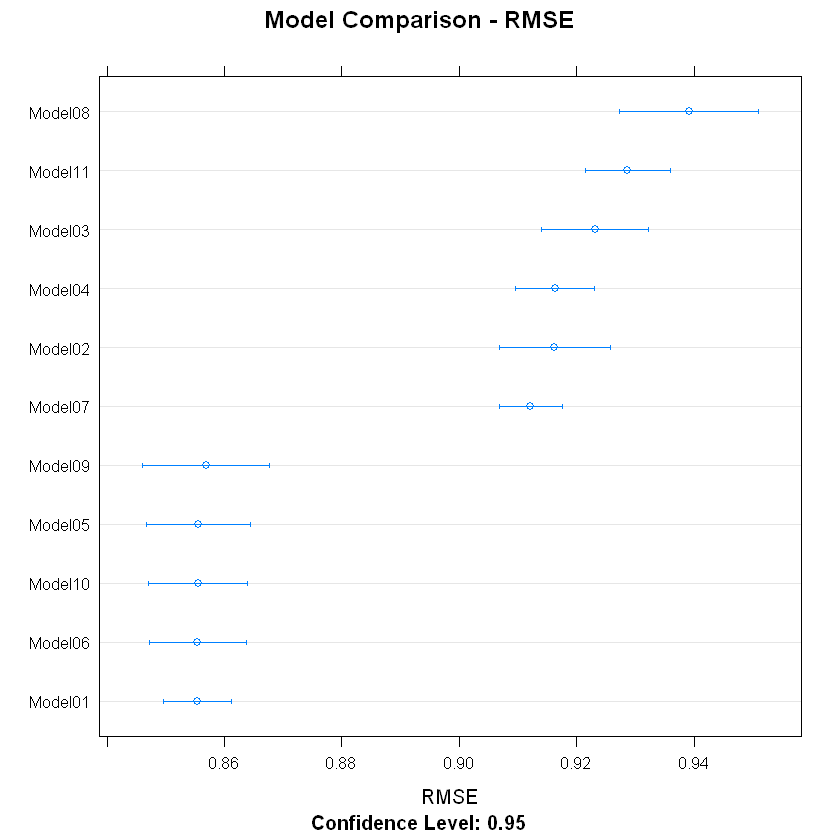

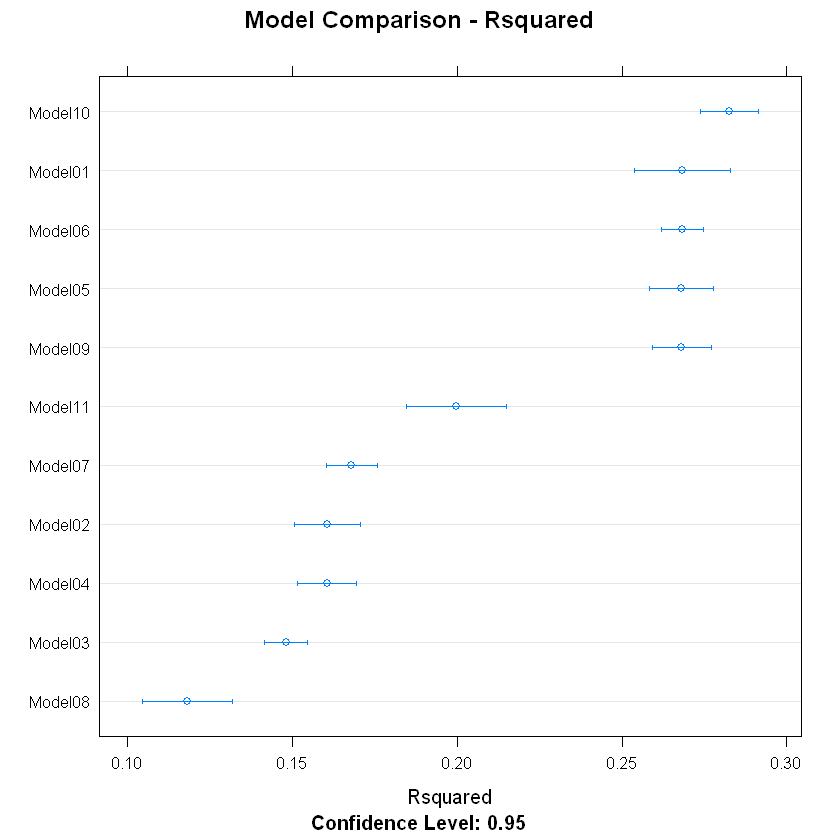

In [43]:
# Load the lattice package for plotting
library(lattice)

# Create the plots using dotplot()
dotplot(results, metric = "MAE", main = "Model Comparison - MAE")
dotplot(results, metric = "RMSE", main = "Model Comparison - RMSE")
dotplot(results, metric = "Rsquared", main = "Model Comparison - Rsquared")